In [5]:
import pandas as pd

In [6]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Bidirectional,Embedding,LSTM

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
df = pd.read_csv('IMDB Dataset.csv')

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [11]:
df.shape

(50000, 2)

In [12]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stopwords = set(stopwords.words('english'))

In [17]:
ps = PorterStemmer()

In [18]:
from gensim.utils import simple_preprocess

In [19]:
list2 = df.review.apply(simple_preprocess)

In [20]:
tokenizer = Tokenizer()

In [21]:
tokenizer.fit_on_texts(list2)

In [22]:
import pickle

In [23]:
# pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [24]:
sequences = tokenizer.texts_to_sequences(list2)

In [25]:
sequences[0]

[25,
 3,
 1,
 74,
 2016,
 43,
 1041,
 10,
 97,
 145,
 38,
 3040,
 389,
 18,
 224,
 26,
 3152,
 29,
 22,
 199,
 12,
 9,
 5,
 606,
 44,
 585,
 15,
 65,
 6,
 6,
 1,
 85,
 144,
 10,
 3196,
 65,
 41,
 3040,
 11,
 88,
 5297,
 2,
 14775,
 132,
 3,
 553,
 58,
 260,
 8,
 199,
 34,
 1,
 641,
 137,
 1704,
 65,
 9,
 5,
 20,
 113,
 14,
 1,
 7776,
 2285,
 37,
 11268,
 9,
 113,
 2550,
 53,
 5820,
 15,
 5410,
 4,
 1437,
 366,
 37,
 553,
 88,
 5,
 3759,
 8,
 1,
 349,
 351,
 3,
 1,
 641,
 6,
 6,
 7,
 5,
 427,
 3040,
 12,
 10,
 5,
 1,
 11437,
 352,
 4,
 1,
 14489,
 6717,
 2495,
 1022,
 50211,
 7,
 2665,
 1383,
 19,
 22609,
 512,
 31,
 4592,
 2412,
 3,
 1,
 1169,
 112,
 27,
 1,
 6898,
 24,
 2860,
 11751,
 2,
 380,
 50212,
 33,
 16288,
 5,
 20,
 292,
 19,
 1,
 4810,
 2870,
 512,
 5,
 335,
 4,
 104,
 24323,
 8031,
 39192,
 14490,
 4964,
 7656,
 2403,
 2,
 49,
 33,
 43653,
 319,
 8952,
 7152,
 12245,
 2,
 8550,
 31210,
 22,
 109,
 218,
 235,
 6,
 6,
 57,
 129,
 1,
 275,
 1302,
 3,
 1,
 113,
 5,
 674,
 4,
 1,

In [26]:
X = pad_sequences(sequences)

In [27]:
vocab_size = len(tokenizer.word_index)+1

In [28]:
y = df.sentiment

In [29]:
y = df.sentiment.replace(to_replace={'positive':0,'negative':1})

In [30]:
y

0        0
1        0
2        0
3        1
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [31]:
model = Sequential()

In [32]:
model.add(Embedding(vocab_size, 10, input_length=len(sequences) ))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(LSTM(59))
# model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50000, 10)         994770    
_________________________________________________________________
bidirectional (Bidirectional (None, 50000, 100)        24400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 59)                37760     
_________________________________________________________________
dense (Dense)                (None, 1)                 60        
Total params: 1,056,990
Trainable params: 1,056,990
Non-trainable params: 0
_________________________________________________________________


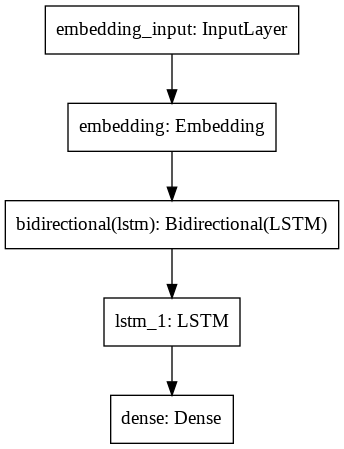

In [34]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [35]:
type(X)
X.shape

(50000, 2380)

In [36]:
# y = list(y)
y.shape

(50000,)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="binary_crossentropy", optimizer='adam',metrics = ['accuracy'])


In [42]:
model.fit(X[:10000],y[:10000], epochs=5, batch_size=32, callbacks=[checkpoint])

Epoch 1/5
313/313 [==============================] - 216s 673ms/step - loss: 0.1635 - accuracy: 0.9425

Epoch 00001: loss improved from inf to 0.16352, saving model to next_words.h5
Epoch 2/5
313/313 [==============================] - 211s 675ms/step - loss: 0.0629 - accuracy: 0.9798

Epoch 00002: loss improved from 0.16352 to 0.06286, saving model to next_words.h5
Epoch 3/5
313/313 [==============================] - 211s 673ms/step - loss: 0.0621 - accuracy: 0.9816

Epoch 00003: loss improved from 0.06286 to 0.06213, saving model to next_words.h5
Epoch 4/5
313/313 [==============================] - 211s 673ms/step - loss: 0.0285 - accuracy: 0.9911

Epoch 00004: loss improved from 0.06213 to 0.02846, saving model to next_words.h5
Epoch 5/5
313/313 [==============================] - 211s 673ms/step - loss: 0.0267 - accuracy: 0.9909

Epoch 00005: loss improved from 0.02846 to 0.02666, saving model to next_words.h5
